# MATH70121 - Topics in Derivative Pricing
## Inflation seasonality and curve 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# path to the folder containing the files (require a slash at the end)
path_to_savedata = "data/"
path_to_savefig = "plots/"

# path to the csv file
path_to_unfiltered_RPI_ts = "data/unfiltered_RPI_ts.csv"
path_to_filtered_RPI_ts = "data/filtered_RPI_ts.csv"

unfiltered_RPI_ts = pd.read_csv(path_to_unfiltered_RPI_ts, header=None)
filtered_RPI_ts = pd.read_csv(path_to_filtered_RPI_ts, header=None)

# Check the difference between the two time series
mask = (pd.read_csv(path_to_unfiltered_RPI_ts, header=None) == pd.read_csv(path_to_filtered_RPI_ts, header=None))

print(unfiltered_RPI_ts[~mask.iloc[:,1]])
print(filtered_RPI_ts[~mask.iloc[:,1]])

# No difference in numerical value
# Choose one as our object time series
object_RPI_ts = unfiltered_RPI_ts

# Pre-precessing out datesets
dataset_info = object_RPI_ts.iloc[:8].copy()
print(dataset_info)

RPI_pct_change_ts = object_RPI_ts.iloc[8:].copy()
RPI_pct_change_ts.iloc[:,1] = RPI_pct_change_ts.iloc[:,1].astype(float)
RPI_pct_change_ts.index.name = None
#RPI_pct_change_ts_annually = RPI_pct_change_ts[:36].copy()
RPI_pct_change_ts_monthly = RPI_pct_change_ts[36:].copy()

# RPI_pct_change_ts_annually.iloc[:,0] = pd.to_datetime(RPI_pct_change_ts_annually.iloc[:,0], format='%Y')
# RPI_pct_change_ts_annually.set_index(0, inplace=True)
# RPI_pct_change_ts_annually.index.name = None
# RPI_pct_change_ts_annually.rename(columns={1: 'RPI_pct_change'}, inplace=True)

RPI_pct_change_ts_monthly.iloc[:,0] = pd.to_datetime(RPI_pct_change_ts_monthly.iloc[:,0], format='%Y %b')
RPI_pct_change_ts_monthly.set_index(0, inplace=True)
RPI_pct_change_ts_monthly.index.name = None
RPI_pct_change_ts_monthly.rename(columns={1: 'RPI_pct_change'}, inplace=True)

# Only include data after 1987 rebasing
starting_RPI = 100.
RPI_pct_change_ts_monthly_new = RPI_pct_change_ts_monthly[RPI_pct_change_ts_monthly.index >= "1987-01"].copy()

                 0    1
3          PreUnit  NaN
7  Important notes  NaN
                 0    1
3          PreUnit  NaN
7  Important notes  NaN
                   0                                               1
0              Title  RPI:Percentage change over 1 month - All items
1               CDID                                            CZEQ
2  Source dataset ID                                            MM23
3            PreUnit                                             NaN
4               Unit                                               %
5       Release date                                      20-03-2024
6       Next release                                   17 April 2024
7    Important notes                                             NaN


In [3]:
q2_obj_ts = RPI_pct_change_ts_monthly_new.copy().squeeze() # pd.Series
monthly_avg = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
monthly_std = q2_obj_ts.groupby(q2_obj_ts.index.month).std()
monthly_counts = q2_obj_ts.groupby(q2_obj_ts.index.month).count()

overall_avg = q2_obj_ts.mean()
overall_std = q2_obj_ts.std()

# Seasonality check
bar = 3
significant = lambda z: 'significant' if np.abs(z) > bar else 'not significant'

# Z-score between highest avg and lowest avg
r_hi = np.argmax(monthly_avg) + 1
r_lo = np.argmin(monthly_avg) + 1

Z_lo_hi = (monthly_avg.loc[r_hi] - monthly_avg.loc[r_lo]) /\
            np.sqrt(monthly_std.loc[r_hi]**2 / monthly_counts.loc[r_hi] +
                    monthly_std.loc[r_lo]**2 / monthly_counts.loc[r_lo])

print('Highest average month: ', r_hi, "Monthly average: ", monthly_avg.loc[r_hi])
print('Lowest average month: ', r_lo, "Monthly average: ", monthly_avg.loc[r_lo])
print(f'Z-score between highest average and lowest average: {Z_lo_hi} -- {significant(Z_lo_hi)}')

Highest average month:  4 Monthly average:  0.9486486486486487
Lowest average month:  1 Monthly average:  -0.29473684210526324
Z-score between highest average and lowest average: 9.39309725807589 -- significant


In [4]:
# path to folder containing the ZCIS data
path_to_ZCIS_folder = "data/ZCIS_data/"

maturities = list(range(1, 11)) + [12, 15, 18, 20, 25, 30]

ZCIS_df = pd.DataFrame()

for m in maturities:
    ZSIC = pd.read_excel(path_to_ZCIS_folder + f'BPSWIT{m} BGN Curncy.xlsx').dropna()
    ZSIC = ZSIC.iloc[::-1]
    ZSIC = ZSIC.set_index('Date')
    ZSIC.index.name = None
    # only month info kept (force all day info to 01)
    ZSIC.index = pd.to_datetime(ZSIC.index, format='%m/%d/%Y').to_period('M').to_timestamp()
    ZSIC = ZSIC.rename(columns={'Last Price': f'{m}'})
    ZCIS_df = pd.concat([ZCIS_df, ZSIC], axis=1)

ZCIS_df.head()

,1,2,3,4,5,6,7,8,9,10,12,15,18,20,25,30
2003-12-01,2.940,2.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01,3.000,2.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,2.885,2.885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-01,3.005,2.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-01,2.965,2.945,NaN,NaN,2.85,NaN,2.89,NaN,NaN,2.95,2.96,3.01,NaN,2.98,3.0,2.97


In [5]:
# swap with 18y maturity is rare, only traded in following days
idx_18y = ZCIS_df.index[~ZCIS_df['18'].isnull()]
print(idx_18y)

DatetimeIndex(['2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='MS')


In [6]:
from financepy.utils.date import Date
from financepy.market.curves.discount_curve import DiscountCurve
from financepy.utils.frequency import FrequencyTypes
from financepy.utils.day_count import DayCount, DayCountTypes
from financepy.market.curves.interpolator import *

####################################################################
# FINANCEPY BETA Version 0.230 - This build:  10 Apr 2024 at 00:25 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [7]:
RPI_index_new = starting_RPI * (1 + RPI_pct_change_ts_monthly_new/100).cumprod()

In [8]:
# Rewrite functionality in FiancePy.InflationCurve as bug exists in its code
# A different method for finding reference index (without interpolation) used to align with our BPSWIT
def getReferenceIndex(indexDate: pd.Timestamp, RPI = RPI_index_new, lag = 2):
    refDate = indexDate - pd.DateOffset(months=lag)
    refIndex = RPI.loc[refDate].squeeze() # float
    return refIndex

def getInflationRatio(indexDate: pd.Timestamp, baseDate: pd.Timestamp = RPI_index_new.index[0], RPI = RPI_index_new, lag = 2):
    vt = getReferenceIndex(indexDate, RPI, lag)
    if baseDate == RPI_index_new.index[0]:
        lag = 0
    v0 = getReferenceIndex(baseDate, RPI, lag)
    return (vt / v0 - 1) * 100 # percentage

# annual spot rate -> annual forward rate
def spot_to_forward(indexDate: pd.Timestamp, ZCIS_df: pd.DataFrame, is18y: bool):
    ZCIS = ZCIS_df.copy()
    if not is18y:
        ZCIS = ZCIS.drop(columns=['18'])
    maturities_ = list(ZCIS.columns.astype(int))

    inflation_reference_index = getReferenceIndex(indexDate)
    breakeven_rate = ZCIS.loc[indexDate] # spot rate

    # annual compound 
    discount_factor = np.array(1 / ((1 + breakeven_rate / 100) ** maturities_))
    breakeven_reference_index = list((inflation_reference_index * (1 + np.array(breakeven_rate) / 100) ** np.array(maturities_)))

    # continuous compound
    # fwd = []
    # for i in range(len(breakeven_reference_index)):
    #     if i == 0:
    #         _fwd = (np.log(breakeven_reference_index[i] / inflation_reference_index) / maturities_[i]) * 100
    #     else:
    #         _fwd = np.log(breakeven_reference_index[i] / breakeven_reference_index[i-1]) / (maturities_[i] - maturities_[i-1]) * 100
    #     fwd.append(_fwd)
    
    # annual compound
    fwd = []
    for i in range(len(breakeven_reference_index)):
        if i == 0:
            _fwd = ((breakeven_reference_index[i] / inflation_reference_index) ** (1 / maturities_[i]) - 1) * 100
        else:
            _fwd = ((breakeven_reference_index[i] / breakeven_reference_index[i-1]) ** (1 / (maturities_[i] - maturities_[i-1]))-1) * 100
        fwd.append(_fwd)

    indexDate_DateType = Date(indexDate.day, indexDate.month, indexDate.year)
    maturity_dates_DateType = [indexDate_DateType.add_years(m) for m in maturities_]

    present_df = pd.DataFrame()
    present_df['Tenor'] = maturities_
    present_df['Break Even Rate (%)'] = breakeven_rate.values
    present_df['Maturity Date'] = maturity_dates_DateType
    present_df['Break Even Reference Number'] = breakeven_reference_index
    present_df['Forward (%)'] = fwd
    present_df.set_index('Tenor', inplace=True)

    return present_df, maturities_, discount_factor, fwd

# Use FinancePy to calculate the discount factor, interpolate, then transform back to fwd
def FitZCISCurve(valuationDate: pd.Timestamp, maturities: list, zero_rates: np.ndarray, interp_type=InterpTypes.FLAT_FWD_RATES, seasonality=False):
    
    valuationDate_DateType = Date(valuationDate.day, valuationDate.month, valuationDate.year)
    df_dates = [valuationDate_DateType.add_years(i) for i in maturities]
    df_values = zero_rates.copy() / 100 # Notice the /100 here

    # Calculate discount factor
    temp_curve = DiscountCurve(valuation_date=valuationDate_DateType, 
                               df_dates=df_dates, 
                               df_values=df_values)
    
    df_values = temp_curve._zero_to_df(valuation_date=valuationDate_DateType, 
                                       rates=df_values, 
                                       times=np.array(maturities),
                                       freq_type=FrequencyTypes.ANNUAL,
                                       day_count_type=DayCountTypes.ACT_360)

    # Create inflation curve
    inflation_curve = DiscountCurve(valuation_date=valuationDate_DateType, 
                                    df_dates=df_dates, 
                                    df_values=df_values, 
                                    interp_type=interp_type)
    
    # monthly year fraction
    year_fraction = np.linspace(1/12, maturities[-1], (maturities[-1])*12)
    interpolate_dates = [valuationDate_DateType.add_years(d) for d in year_fraction]

    # interpolated discount factor
    monthly_discount_factor = inflation_curve.df(interpolate_dates)

    # interpolated forward rate
    monthly_fwd = []
    fwd_start_date = valuationDate_DateType
    fwd_tenor_date = fwd_start_date.add_years(1/12)
    for _ in range((maturities[-1])*12):
        monthly_fwd.append(inflation_curve.fwd_rate(start_date=fwd_start_date, 
                                                    date_or_tenor=fwd_tenor_date))
        fwd_start_date = fwd_tenor_date
        fwd_tenor_date = fwd_start_date.add_years(1/12)
    
    # ON fwd
    ONfwd_rate = inflation_curve._fwd(year_fraction)

    # zero rate
    zero_rate = inflation_curve.swap_rate(effective_date = valuationDate_DateType,
                                        maturity_date = interpolate_dates)
        
    if seasonality:
        sf = SF.copy()
        sf = np.tile(np.roll(sf/100, -(valuationDate.month-1)), maturities[-1])
        monthly_fwd = np.array(monthly_fwd) + sf
        ONfwd_rate = np.array(ONfwd_rate) + sf
        N = len(zero_rate)
        decay1 = np.exp(np.arange(0, N//3) / 50)
        decay2 = 1 + np.arange(N//3, N) / 15
        decay = np.concatenate((decay1, decay2))
        zero_rate = np.array(zero_rate) + sf / decay

    return np.array(df_values), np.array(monthly_discount_factor), np.array(monthly_fwd), np.array(ONfwd_rate), np.array(zero_rate)

In [9]:
start_date = "2010-01-01"
starting_month = 0
valuationDate1 = pd.to_datetime(start_date)
temp_res1 = spot_to_forward(valuationDate1, ZCIS_df, is18y=(valuationDate1 in idx_18y))
res1 = FitZCISCurve(valuationDate=valuationDate1, 
                    maturities=temp_res1[1], 
                    zero_rates=np.array(temp_res1[0].iloc[:,0]))

In [10]:
# Check FinancePy's annual df is the same as ours
assert(np.linalg.norm(temp_res1[2] - res1[0]) < 1e-8)

In [11]:
sf = [0.8020396596266696,
 0.48992026636380487,
 0.32976100086226967,
 0.02650694290652503,
 -0.2100412557701757,
 -0.10644056401487413,
 0.37332229057311356,
 0.2152748946482944,
 0.018143944081691107,
 0.09591748853595952,
 0.19026211958098493,
 0.21003183640780787]
#sf = np.array(sf)/ np.product(sf)**(1/12)       # multiplicatively normalize  => product = 1
sf = np.round((np.array(sf)- np.mean(sf)),40)    # additively normalize  => sum = 0
np.sum(sf)

3.894454203567932e-16

In [12]:
a = res1[2]*100

for i in range(len(a)):
    #a[i] = a[i]*(1 + sf[(i+4)%12]/100)
    a[i] = a[i] + sf[(i+4)%12]

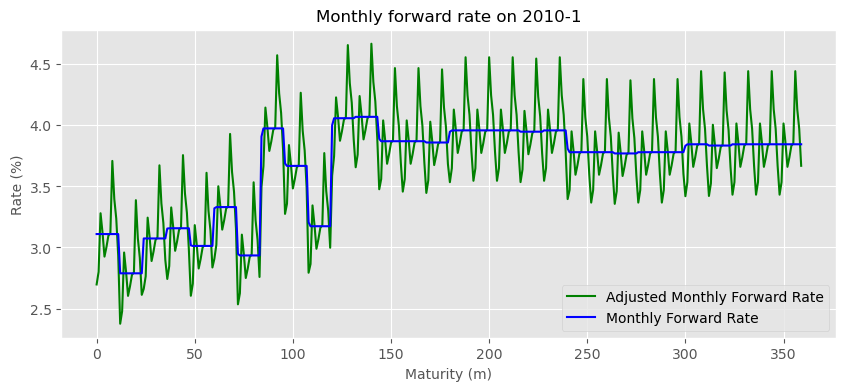

In [13]:
plt.figure(figsize=(10,4))
plt.plot( a,  'g-', label='Adjusted Monthly Forward Rate')
plt.plot(res1[2] * 100, 'b-', label='Monthly Forward Rate')
plt.title(f'Monthly forward rate on {valuationDate1.year}-{valuationDate1.month}', size=12)
plt.xlabel('Maturity (m)', size=10)
plt.ylabel('Rate (%)', size=10)
plt.legend()
#plt.savefig(path_to_savefig + 'zero_rates.png')
plt.show()

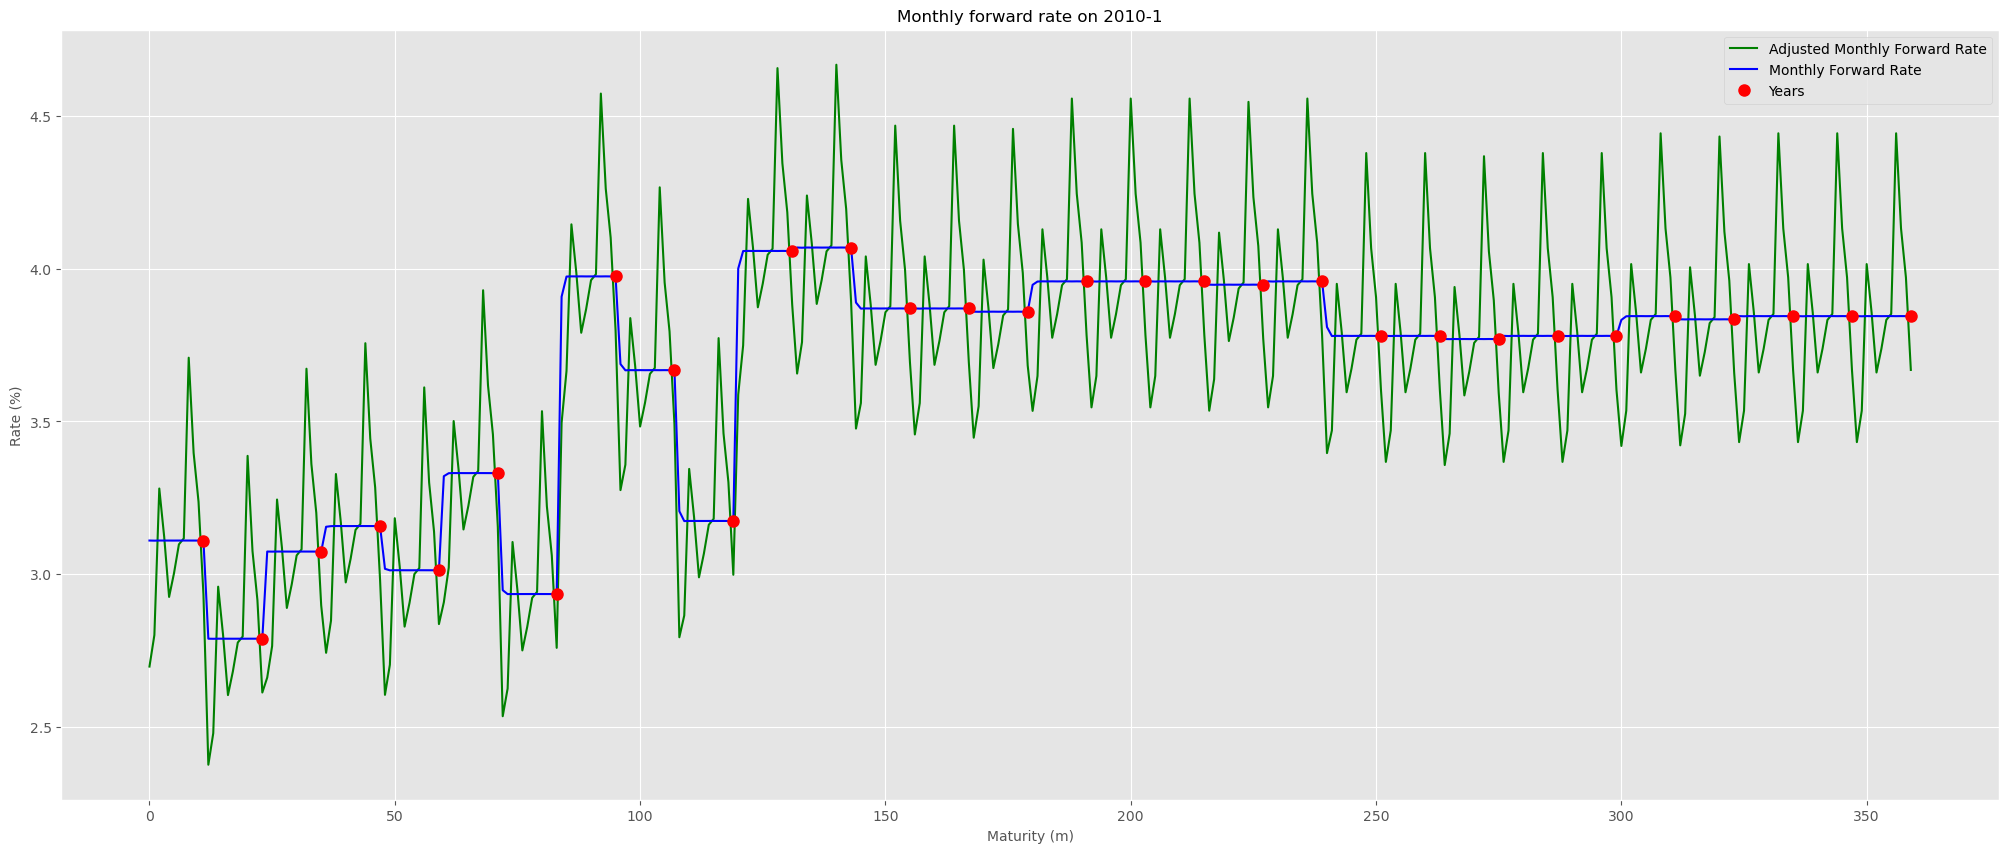

In [14]:
monthly_forward_rate = res1[2] * 100

plt.figure(figsize=(25,10))
plt.plot(a, 'g-', label='Adjusted Monthly Forward Rate')
plt.plot(monthly_forward_rate, 'b-', label='Monthly Forward Rate')
highlight_indices = [i for i in range(len(monthly_forward_rate)) if (i + 1) % 12 == 0]
highlight_x = [i for i in range(len(monthly_forward_rate)) if i in highlight_indices]
highlight_y = [monthly_forward_rate[i] for i in highlight_indices]
plt.plot(highlight_x, highlight_y, 'ro', markersize=8, label='Years')
plt.title(f'Monthly forward rate on {valuationDate1.year}-{valuationDate1.month}', size=12)
plt.xlabel('Maturity (m)', size=10)
plt.ylabel('Rate (%)', size=10)
plt.legend()
plt.show();

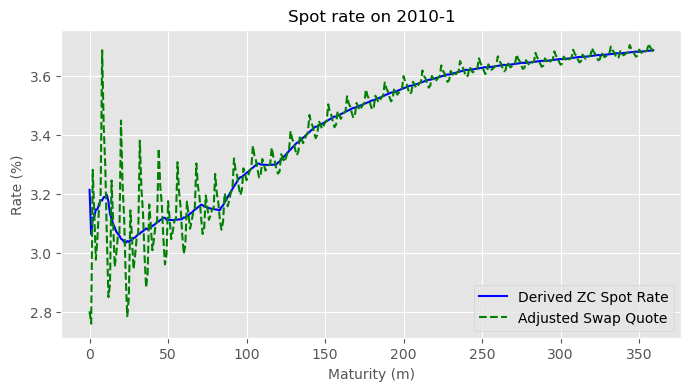

In [15]:
b = res1[4] * 100
for i in range(len(a)):
    #b[i] = b[i]*(1 + sf[(i+4)%12]/100)
    if i <= len(a)//3:
        b[i] = b[i] + sf[(i+4)%12]/(np.exp(i/50))
    else:
        b[i] = b[i] + sf[(i+4)%12]/(1+ i/15)

plt.figure(figsize=(8,4))
plt.plot(res1[4] * 100, 'b-', label='Derived ZC Spot Rate')
#plt.plot(np.array(temp_res1[1]) * 12, np.array(temp_res1[0].iloc[:,0]), 'r*', label='Real Swap Quote')
plt.plot(b, 'g--', label='Adjusted Swap Quote')
plt.title(f'Spot rate on {valuationDate1.year}-{valuationDate1.month}', size=12)
plt.xlabel('Maturity (m)', size=10)
plt.ylabel('Rate (%)', size=10)
plt.legend()
#plt.savefig(path_to_savefig + 'zero_rates.png')
plt.show()

In [16]:
from collections import defaultdict

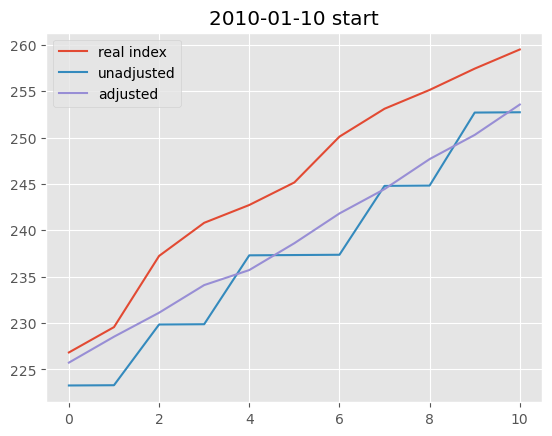

In [17]:
## using forward curve
start_date = '2010-03-01' # go 
starting_month = 0  # 0 = Jan, 1 = Feb, ...
lst1 = [5,10,15,20,25,30,35,40,45,50,55]
lst2 = ['2010-06-01','2010-11-01','2011-04-01','2011-09-01','2012-02-01','2012-07-01','2012-12-01','2013-05-01','2013-09-01','2014-02-01','2014-07-01']

result = defaultdict(list)

valuationDate1 = pd.to_datetime(start_date)
temp_res1 = spot_to_forward(valuationDate1, ZCIS_df, is18y=(valuationDate1 in idx_18y))
res1 = FitZCISCurve(valuationDate=valuationDate1, 
                    maturities=temp_res1[1], 
                    zero_rates=np.array(temp_res1[0].iloc[:,0]))
a = res1[2]*100

for i in range(len(a)):
    #a[i] = a[i]*(1 + sf[(i+4)%12]/100)
    a[i] = a[i] + sf[(i+4)%12]

for i in range(len(lst1)):
    target_month = lst1[i]
    target_date = lst2[i]

    start_index = RPI_index_new['RPI_pct_change'].loc[start_date]
    #print('index at {}:'.format(start_date), start_index)
    target_index = RPI_index_new['RPI_pct_change'].loc[target_date]
    #print('real index at {}:'.format(target_date), target_index)

    if target_month >= 12:
        years = target_month//12
        months = target_month % 12
        l1 = start_index * (1 + a[12 * years]/100)**(years)
        l1 = l1 * np.product((1+ a[12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))

        l2= start_index * (1 + res1[4][12 * years])**(years)
        l2 = l2 * np.product((1+ res1[4][12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))
    else:
        l1 = start_index *np.product((1+ a[starting_month: starting_month + target_month]/100)**(1/12))
        l2= start_index* np.product((1+ res1[4][starting_month: starting_month + target_month]/100)**(1/12))

    #print('adjusted rate l1:', l1)
    #print('unadjusted rate l2:', l2)

    #diff1 = np.abs(l1 - target_index)
    #diff2 = np.abs(l2 - target_index)

    #if diff1 < diff2:
    #    print('adjusted rate is closer to the real index than unadjusted rate')
    #else:
    #    print('unadjusted rate is closer to the real index than adjusted rate')
    result['real_index'].append(target_index)
    result['adjusted'].append(l1)
    result['unadjusted'].append(l2)

plt.plot(result['real_index'],label = 'real index')
plt.plot(result['unadjusted'], label = 'unadjusted')
plt.plot(result['adjusted'], label = 'adjusted')
plt.title('2010-01-10 start')
plt.legend()
plt.show()

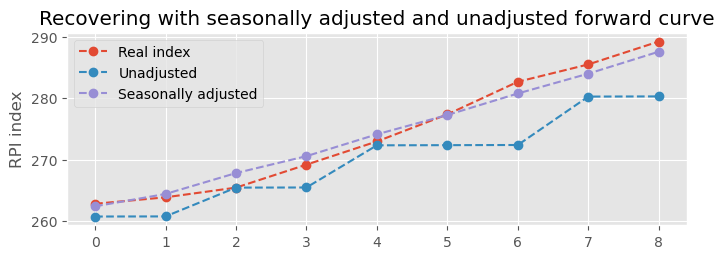

In [18]:
## using forward curve
start_date = '2015-03-01' # go 
starting_month = 0  # 0 = Jan, 1 = Feb, ...
lst1 = [5,10,15,20,25,30,35,40,45]
lst2 = ['2015-06-01','2015-11-01','2016-04-01','2016-09-01','2017-02-01','2017-07-01','2017-12-01','2018-05-01','2018-09-01']

result = defaultdict(list)

valuationDate1 = pd.to_datetime(start_date)
temp_res1 = spot_to_forward(valuationDate1, ZCIS_df, is18y=(valuationDate1 in idx_18y))
res1 = FitZCISCurve(valuationDate=valuationDate1, 
                    maturities=temp_res1[1], 
                    zero_rates=np.array(temp_res1[0].iloc[:,0]))
a = res1[2]*100

for i in range(len(a)):
    #a[i] = a[i]*(1 + sf[(i+4)%12]/100)
    a[i] = a[i] + sf[(i+4)%12]

for i in range(len(lst1)):
    target_month = lst1[i]
    target_date = lst2[i]

    start_index = RPI_index_new['RPI_pct_change'].loc[start_date]
    #print('index at {}:'.format(start_date), start_index)
    target_index = RPI_index_new['RPI_pct_change'].loc[target_date]
    #print('real index at {}:'.format(target_date), target_index)

    if target_month >= 12:
        years = target_month//12
        months = target_month % 12
        l1 = start_index * (1 + a[12 * years]/100)**(years)
        l1 = l1 * np.product((1+ a[12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))

        l2= start_index * (1 + res1[4][12 * years])**(years)
        l2 = l2 * np.product((1+ res1[4][12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))
    else:
        l1 = start_index *np.product((1+ a[starting_month: starting_month + target_month]/100)**(1/12))
        l2= start_index* np.product((1+ res1[4][starting_month: starting_month + target_month]/100)**(1/12))

    #print('adjusted rate l1:', l1)
    #print('unadjusted rate l2:', l2)

    #diff1 = np.abs(l1 - target_index)
    #diff2 = np.abs(l2 - target_index)

    #if diff1 < diff2:
    #    print('adjusted rate is closer to the real index than unadjusted rate')
    #else:
    #    print('unadjusted rate is closer to the real index than adjusted rate')
    result['real_index'].append(target_index)
    result['adjusted'].append(l1)
    result['unadjusted'].append(l2)

plt.figure(figsize=(8,2.5))
plt.plot(result['real_index'],'o--',label = 'Real index')
plt.plot(result['unadjusted'],'o--', label = 'Unadjusted')
plt.plot(result['adjusted'], 'o--',label = 'Seasonally adjusted')
plt.ylabel('RPI index')
plt.title('Recovering with seasonally adjusted and unadjusted forward curve')
plt.legend()
plt.show()

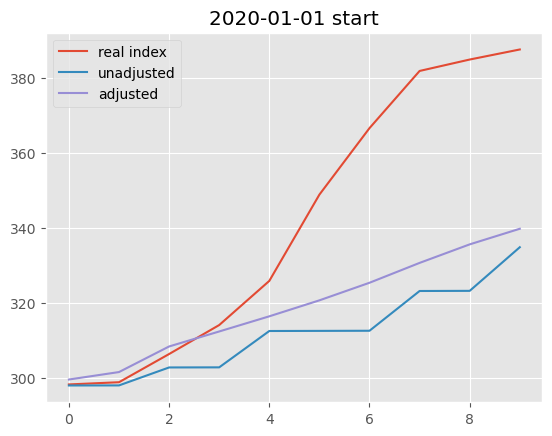

In [19]:
## using forward curve
start_date = '2020-03-01' # go 
starting_month = 0  # 0 = Jan, 1 = Feb, ...
lst1 = [5,10,15,20,25,30,35,40,45,50]
lst2 = ['2020-06-01','2020-11-01','2021-04-01','2021-09-01','2022-02-01','2022-07-01','2022-12-01','2023-05-01','2023-09-01','2024-02-01']

result = defaultdict(list)

valuationDate1 = pd.to_datetime(start_date)
temp_res1 = spot_to_forward(valuationDate1, ZCIS_df, is18y=(valuationDate1 in idx_18y))
res1 = FitZCISCurve(valuationDate=valuationDate1, 
                    maturities=temp_res1[1], 
                    zero_rates=np.array(temp_res1[0].iloc[:,0]))
a = res1[2]*100

for i in range(len(a)):
    #a[i] = a[i]*(1 + sf[(i+4)%12]/100)
    a[i] = a[i] + sf[(i+4)%12]

for i in range(len(lst1)):
    target_month = lst1[i]
    target_date = lst2[i]

    start_index = RPI_index_new['RPI_pct_change'].loc[start_date]
    #print('index at {}:'.format(start_date), start_index)
    target_index = RPI_index_new['RPI_pct_change'].loc[target_date]
    #print('real index at {}:'.format(target_date), target_index)

    if target_month >= 12:
        years = target_month//12
        months = target_month % 12
        l1 = start_index * (1 + a[12 * years]/100)**(years)
        l1 = l1 * np.product((1+ a[12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))

        l2= start_index * (1 + res1[4][12 * years])**(years)
        l2 = l2 * np.product((1+ res1[4][12 * years + starting_month: 12 * years + starting_month + months]/100)**(1/12))
    else:
        l1 = start_index *np.product((1+ a[starting_month: starting_month + target_month]/100)**(1/12))
        l2= start_index* np.product((1+ res1[4][starting_month: starting_month + target_month]/100)**(1/12))

    #print('adjusted rate l1:', l1)
    #print('unadjusted rate l2:', l2)

    diff1 = np.abs(l1 - target_index)
    diff2 = np.abs(l2 - target_index)

    #if diff1 < diff2:
    #    print('adjusted rate is closer to the real index than unadjusted rate')
    #else:
    #    print('unadjusted rate is closer to the real index than adjusted rate')
    result['real_index'].append(target_index)
    result['adjusted'].append(l1)
    result['unadjusted'].append(l2)

plt.plot(result['real_index'],label = 'real index')
plt.plot(result['unadjusted'], label = 'unadjusted')
plt.plot(result['adjusted'], label = 'adjusted')
plt.title('2020-01-01 start')
plt.legend()
plt.show()

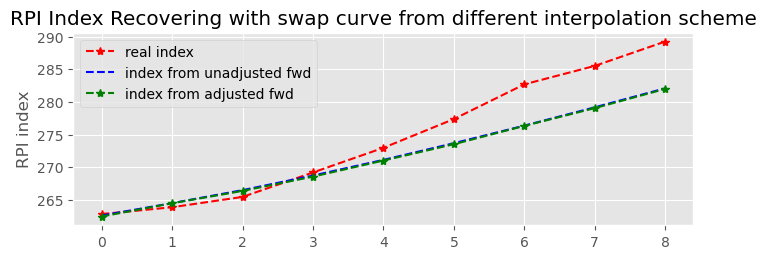

In [20]:
## using decaying swap quote curve
start_date = '2015-03-01' # go 
starting_month = 0  # 0 = Jan, 1 = Feb, ...
lst1 = [5,10,15,20,25,30,35,40,45]
lst2 = ['2015-06-01','2015-11-01','2016-04-01','2016-09-01','2017-02-01','2017-07-01','2017-12-01','2018-05-01','2018-09-01']

result = defaultdict(list)

valuationDate1 = pd.to_datetime(start_date)
temp_res1 = spot_to_forward(valuationDate1, ZCIS_df, is18y=(valuationDate1 in idx_18y))
res1 = FitZCISCurve(valuationDate=valuationDate1, 
                    maturities=temp_res1[1], 
                    zero_rates=np.array(temp_res1[0].iloc[:,0]))

b = res1[4] * 100
for i in range(len(b)):
    #b[i] = b[i]*(1 + sf[(i+4)%12]/100)
    if i <= len(b)//3:
        b[i] = b[i] + sf[(i+4)%12]/(np.exp(i/50))
    else:
        b[i] = b[i] + sf[(i+4)%12]/(1+ i/15)

for i in range(len(lst1)):
    target_month = lst1[i]
    target_date = lst2[i]

    start_index = RPI_index_new['RPI_pct_change'].loc[start_date]
    #print('index at {}:'.format(start_date), start_index)
    target_index = RPI_index_new['RPI_pct_change'].loc[target_date]
    #print('real index at {}:'.format(target_date), target_index)

    l1 = start_index * np.product((1+ b[: target_month]/100)**(1/12))
    l2 = start_index * np.product((1+ res1[4][: target_month])**(1/12))

    #print('adjusted rate l1:', l1)
    #print('unadjusted rate l2:', l2)

    diff1 = np.abs(l1 - target_index)
    diff2 = np.abs(l2 - target_index)

    #if diff1 < diff2:
    #    print('adjusted rate is closer to the real index than unadjusted rate')
    #else:
    #    print('unadjusted rate is closer to the real index than adjusted rate')
    result['real_index'].append(target_index)
    result['adjusted'].append(l1)
    result['unadjusted'].append(l2)

plt.figure(figsize=(8,2.5))
plt.plot(result['real_index'], 'r*--',label = 'real index')
plt.plot(result['unadjusted'],'b--' ,label = 'index from unadjusted fwd')
plt.plot(result['adjusted'], 'g*--',label = 'index from adjusted fwd')
plt.title('RPI Index Recovering with swap curve from different interpolation scheme')
plt.ylabel('RPI index')
plt.legend()
plt.savefig(path_to_savefig + 'offbench swap.png')
plt.show()